<a href="https://colab.research.google.com/github/rimcode6/Predictive-Absenteeism-Modeling-in-the-workplace/blob/main/predictive_absenteeism_modeling_in_the_workplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd                  #Importing Pandas library
import numpy as np                   #Importing numpy library
import matplotlib.pyplot as plt      # Import matplotlib library
import os
import warnings
from calendar import day_name     #Import days of the week library
from collections import deque
import altair as alt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading and importing Dataset**
The data set contents the attendence of all the employees from a company, the data set is taken from UCI ML page: Martiniano,Andrea and Ferreira,Ricardo. (2018). Absenteeism at work. UCI Machine Learning Repository. https://doi.org/10.24432/C5X882.

In [ ]:
project=pd.read_excel('/content/drive/My Drive/Dataset.xls') #Reading dataset


**Data Cleaning**

In [ ]:
#Below code was found from here : https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251.
#This function was created by Nikos Tavoularis and shared on stackoverflow.com. Comments in below functions were added by Smit Patel

def missing_values_table(df):
        mis_val = df.isnull().sum()                                #Counts the number of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)        #Calculates the precentage of missing valyes
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #Concates the above variables
        mis_val_table_ren_columns = mis_val_table.rename(              #renames the column
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[              # Sort and round the values the column in ascending order
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(project)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
new_project=project.loc[ : , ['ID','Age', 'Body mass index','Social drinker',
       'Social smoker','Son','Day of the week','Month of absence','Seasons','Service time','Absenteeism time in hours'] ] #Subsetting columns of interest

In [ ]:
new_project.columns=['ID','Age', 'BMI', 'Social_drinker', 'Social_smoker', 'Son',
       'Day_of_the_week', 'Month_of_absence', 'Seasons', 'Service_time','Absenteeism_time_in_hours'] #Renaming column  names

In [ ]:
new_project.drop(new_project[new_project.Absenteeism_time_in_hours==0].index,inplace=True) #Dropping data that contains 0 hours in absenteeism_time_in_hours columns


In [ ]:
new_project.shape #Dimension of the dataset after cleaning and subsetting columns of interest

(696, 11)

**DataSet Distribution**

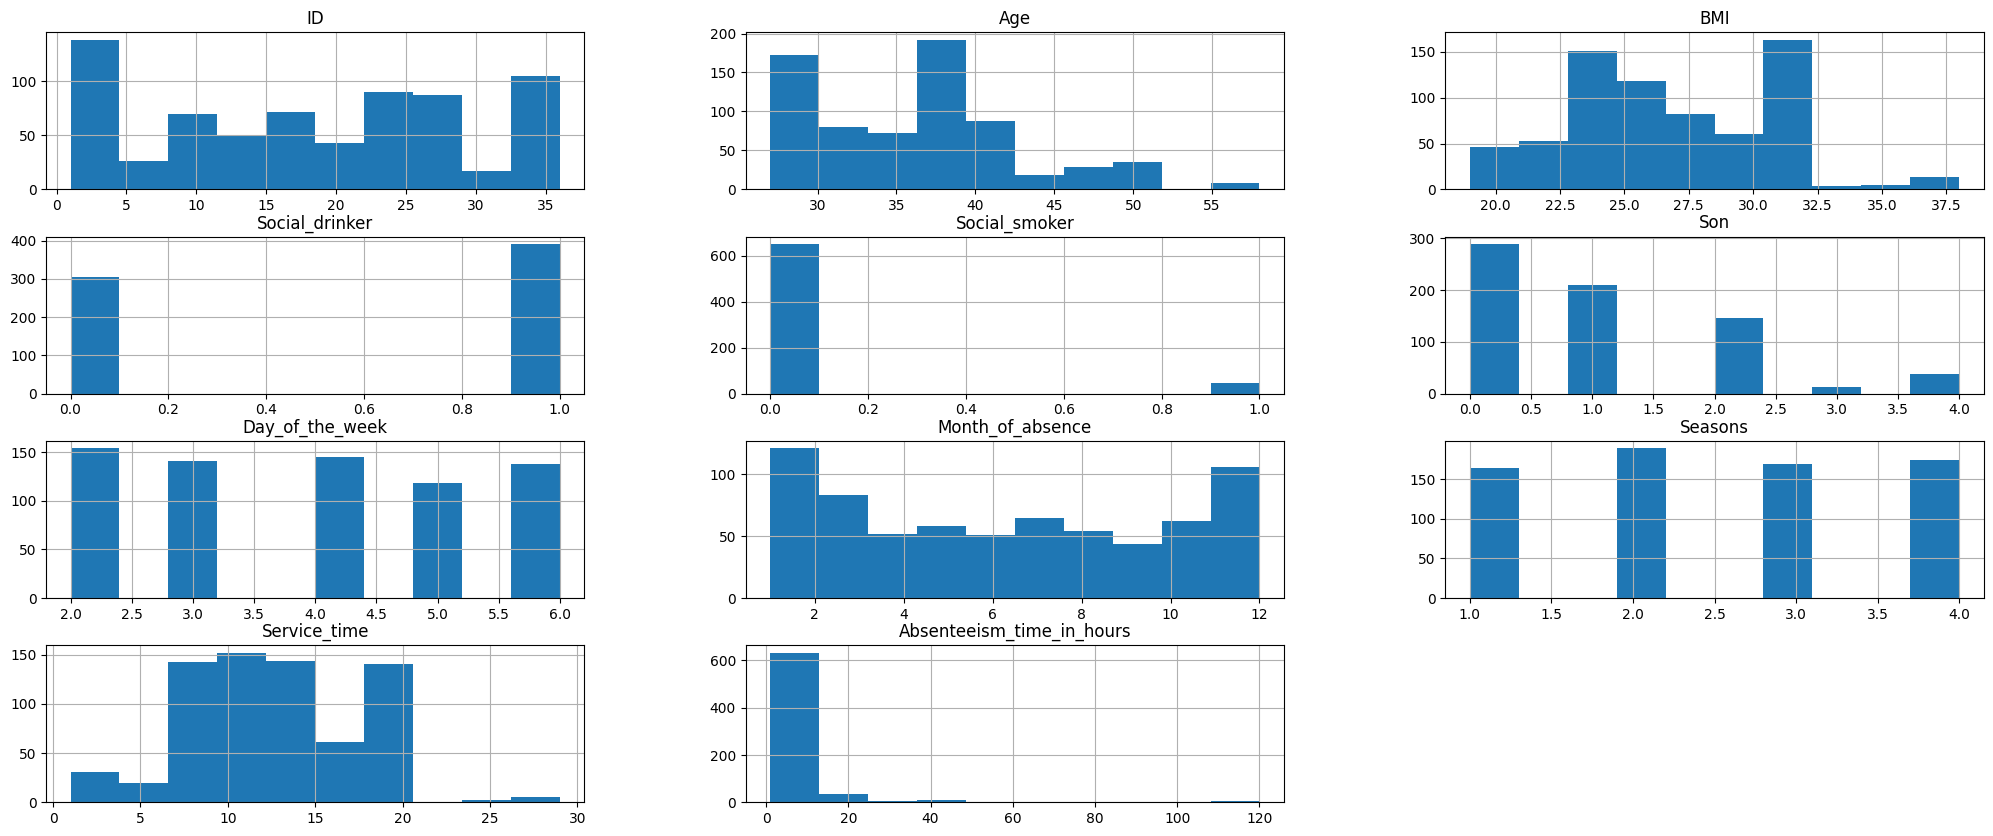

In [ ]:
plt.rcParams['figure.figsize']=25,10               #Selecting size and width of the plot
new_project.hist()                                 #Choosing bar/histogram for visualization
plt.show()                                         #Display the visualization

In [ ]:
new_project1=new_project #Copying dataframe into new dataframe. To avoid messing with original dataframe

**Result Analysis**


The original dataset comprised 740 observations and 21 variables. Following the subsetting process and the removal of certain columns, the dataset's size was reduced to 696 observations and 11 variables. To prevent the loss of potentially valuable data from the original dataset, a copy of the subsetted dataset was made and stored in a new dataframe.

**Q1) Which age demographic has the highest rate of absenteeism from work?**

In [ ]:
#Binning Age Column
#Calculation in this section is suggested by Lauren Foltz using Excel, However Coding in below section was developed and executed by Smit Patel
bins = [20,29,39,49,59]   #Creating bins
labels=['Adult20s','Adult30s','Adult40s','Adult50s'] #Labelling bins

In [ ]:
new_project1['age_fact']=pd.cut(new_project1['Age'],bins=bins,labels=labels) #Creating new column with bins that are appropriate for each rows

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
hours_sum = new_project1.groupby(['ID', 'age_fact'], as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins


In [ ]:
hours_sum=hours_sum.dropna() #Removing NA's that are generated during the process


In [ ]:
age_hours_missed=round(hours_sum.groupby('age_fact')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by emplyees based on Age group and rounding to two decimals

In [ ]:
age_hours_missed #Avg hours missed by employees based on Unique ID.


,Absenteeism_time_in_hours
age_fact,
Adult20s,21.48
Adult30s,86.52
Adult40s,29.42
Adult50s,17.85


Q1 Result: Adults in their 50s miss work the most, followed by adults in their 30s.






**Q2) Which BMI group has the highest rate of absenteeism?**

In [ ]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
bin2=[19,24,29,38]          #Binning BMI
labels2=['Normal','Overweight','Obese'] #labelling BMI's

In [ ]:
new_project1['BMI_fact']=pd.cut(new_project1['BMI'],bins=bin2,labels=labels2) #Creating new column to represent BMI value assocaited with bins and labels

In [ ]:
BMI_sum = new_project1.groupby(['ID', 'BMI_fact'], as_index=False)['Absenteeism_time_in_hours'].sum() #Sum number of hours missed by employees based on Unique ID and labeled bins


In [ ]:
BMI_sum=BMI_sum.dropna() #Removing NA's that are generated during the process

In [ ]:
BMI_hours_missed=round(BMI_sum.groupby('BMI_fact')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by emplyees based on BMI group and rounding to two decimals

In [ ]:
BMI_hours_missed #Avg hours missed by employees based on Unique ID.


,Absenteeism_time_in_hours
BMI_fact,
Normal,44.82
Overweight,58.52
Obese,44.27


Q2 Result: People with obesity tend to miss more work compared to those with normal or overweight BMI. Surprisingly, the next group with higher work absenteeism is not the overweight BMI category.



```
# Used Binning range:
BMI          BMI Bin
19-24        Normal
25-29        Overweight
30-38        Obese
```




**Q3) Do Drinkers or Non-Drinkers miss the most work?**

In [ ]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
new_project1['Drinker_cat']=pd.cut(new_project1.Social_drinker,2,labels=['Drinker','Non-Drinker']) #Creating new column and assigning lables based on values present in Social_drinker column

In [ ]:
Drinker_sum = new_project1.groupby(['ID', 'Drinker_cat'], as_index=False)['Absenteeism_time_in_hours'].sum()
 #Sum number of hours missed by employees based on Unique ID and labeled bins

In [ ]:
Drinker_sum=Drinker_sum.dropna() #Removing NA's that are generated durig the process


In [ ]:
Drinker_hours_missed=round(Drinker_sum.groupby('Drinker_cat')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by emplyees based on Drinker's group and rounding to two decimals

In [ ]:
Drinker_hours_missed #Avg hours missed by employees based on Unique ID.


,Absenteeism_time_in_hours
Drinker_cat,
Drinker,57.52
Non-Drinker,97.76


Q3 Result: Non-Drinker employees misses more work compare to Drinker.



**Q4) Do Smokers or Non-Smokers miss the most work?**

In [ ]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
new_project1['Smoker_cat']=pd.cut(new_project1.Social_smoker,2,labels=['Smoker','Non-Smoker']) #Creating new column and assigning lables based on values present in Social_smoker column

In [ ]:
Smoker_sum = new_project1.groupby(['ID', 'Smoker_cat'], as_index=False)['Absenteeism_time_in_hours'].sum()
 #Sum number of hours missed by employees based on Unique ID and labeled bins

In [ ]:
Smoker_sum=Smoker_sum.dropna() #Removing NA's that are generated durig the process


In [ ]:
Smoker_hours_missed=round(Smoker_sum.groupby('Smoker_cat')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by employees based on Smoker's group and rounding to 2 decimals

In [ ]:
Smoker_hours_missed #Avg hours missed by employees based on Unique ID.


,Absenteeism_time_in_hours
Smoker_cat,
Smoker,144.64
Non-Smoker,10.64


Q4 Result: Non-Drinker misses more work compare to Drinker. Smoker misses more work compare to Non-smoker.



**Q5) Do people with children miss more than people without?**

In [ ]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
bin3=[-np.inf,0,np.inf] #Creting bins for 0-4 levels in "son" column

In [ ]:
new_project1['son_fact']=pd.cut(new_project1.Son,bins=bin3,labels=['None','some']) #Creating new column and assigning lables based on values present in 'Son' column

In [ ]:
Son_sum = new_project1.groupby(['ID', 'son_fact'], as_index=False)['Absenteeism_time_in_hours'].sum()
#Sum number of hours missed by employees based on Unique ID and labeled bins


In [ ]:
Son_sum=Son_sum.dropna() #Removing NA's that are generated durig the process


In [ ]:
Son_hours_missed=round(Son_sum.groupby('son_fact')[['Absenteeism_time_in_hours']].mean(),2) #Calculating AVG hours missed by employees based on Son's group and rounding to 2 decimals

In [ ]:
Son_hours_missed


,Absenteeism_time_in_hours
son_fact,
None,48.64
some,106.64


Q5 Result: Employess with 1 or more children misses more work compare to employees with no children



**Q6) Which day of the week is missed most? Which month? Which season?**

In [ ]:
days = deque(day_name)          #Dequing days of the week


In [ ]:
days.rotate(2)                    # rotate days
days_map = dict(enumerate(days)) #Creating dictionary

In [ ]:
new_project4=new_project1 #Copying dataset into new datafram to avoid overwriting


In [ ]:
new_project4['Day_Factor'] = new_project4['Day_of_the_week'].map(days_map) #Mapping days of the week to a dataframe

In [ ]:
Day_filter=new_project4.filter(['Day_Factor','Absenteeism_time_in_hours']) #Filtering columns of interest

In [ ]:
Day_filter.groupby('Day_Factor').sum()[['Absenteeism_time_in_hours']].sort_values(['Absenteeism_time_in_hours'],ascending=False) #Grouping by Days of the week, summing and Sorting hours in descending order

,Absenteeism_time_in_hours
Day_Factor,
Monday,1489
Tuesday,1229
Wednesday,1115
Friday,738
Thursday,553


In [ ]:
alt.renderers.enable('kaggle')#Rendering notebook

RendererRegistry.enable('kaggle')

In [ ]:
alt.Chart(new_project4).mark_bar().encode(                                                                                    #Selecting Bar chart for visualization
    alt.X('Day_Factor:N',axis=alt.Axis(title='Days of the week'),sort=['Monday','Tuesday','Wednesday','Thursday','Friday']),  #Assigning data to x-axis, adding title and sorting by Days of the week
    alt.Y('sum(Absenteeism_time_in_hours):Q',axis=alt.Axis(title='Absenteeism time in hours')),                               #Assigning data to Y-axis and adding title
    color=alt.Color('Day_Factor:N',title='Days of the Week',sort=['Monday','Tuesday','Wednesday','Thursday','Friday'])      #Assigning color to visualization, adding title and sorting by Days of the week
).properties(width=200,height=200)                                                                                          #Assigning height and width of the plot

alt.Chart(...)

Q6 Result: Employees are mostly absent on Monday, Tuesday and Wednesday.


**Q7) Which Month is missed by employees ?**

In [ ]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
month_filter=new_project1.filter(['Month_of_absence','Absenteeism_time_in_hours']) #Filtering columns of interest

In [ ]:
month_group=month_filter.groupby(['Month_of_absence']).sum()[['Absenteeism_time_in_hours']] #Grouping and summing hours missed by employees

In [ ]:
month_group #Output of Month and total hours missed by employees for each month


,Absenteeism_time_in_hours
Month_of_absence,
1,222
2,294
3,765
4,482
5,400
6,411
7,734
8,288
9,292


In [ ]:
alt.Chart(new_project1).mark_bar().encode(                                                         #Selecting Bar chart for visualization
    alt.X('Month_of_absence:Q',axis=alt.Axis(title='Months',ticks=True),bin=alt.Bin(maxbins=30)),  #Assigning data to x-axis, adding title and adding maximum number of bins to x-axis
    alt.Y('sum(Absenteeism_time_in_hours):Q',axis=alt.Axis(title='Absenteeism time in hours')),    #Assigning data to Y-axis and adding title
    color=alt.Color('Month_of_absence:N',legend=None)                                              #Assigning color to visualization and adding title
).properties(width=300,height=200)                                                                 #Assigning height and width of the plot

alt.Chart(...)

**Q8) Which Season is missed by employees?**

In [ ]:
#Calculation in this section is suggested by Lauren Foltz using Excel, Coding developed and executed by Smit Patel
new_project4['seasons_fact']=pd.cut(new_project4.Seasons,4,labels=['Summer','Autumn','Winter','Spring']) #Adding dummy column to covnert numerical data to categorical

In [ ]:
season_filter=new_project4.filter(['seasons_fact','Absenteeism_time_in_hours']) #Filtering columns of interest

In [ ]:
seasons_group=season_filter.groupby(['seasons_fact']).sum()[['Absenteeism_time_in_hours']] #Grouping by Seasons and adding number of hours missed by employees


In [ ]:
seasons_group #Output of Seasons and number of hours missed by employees


,Absenteeism_time_in_hours
seasons_fact,
Summer,1241
Autumn,1152
Winter,1492
Spring,1239


In [ ]:
alt.Chart(new_project4).mark_bar().encode(                                                     #Selecting Bar chart for visualization
    alt.X('seasons_fact:N',axis=alt.Axis(title='Seasons')),                                    #Assigning data to x-axis and adding title
    alt.Y('sum(Absenteeism_time_in_hours):Q',axis=alt.Axis(title='Absenteeism time in hours')), #Assigning data to Y-axis and adding title
    color=alt.Color('seasons_fact:N',title='Seasons')                                           #Assigning color to visualization and adding title
).properties(width=200,height=200)                                                              #Assigning height and width of the plot

alt.Chart(...)

**Correlation and Cluster Analysis**

Q8 Result: Most employees are absent in March and July,which are Summer and winter seasons in Brazil. This data correlates with the above season output.



```
# Season breakdown used:

Month            Seasons
Jan- March       Summer
April- June      Autumn
July- Sept       Winter
Oct- Dec         Spring
```



**Correlation and Cluster Analysis**

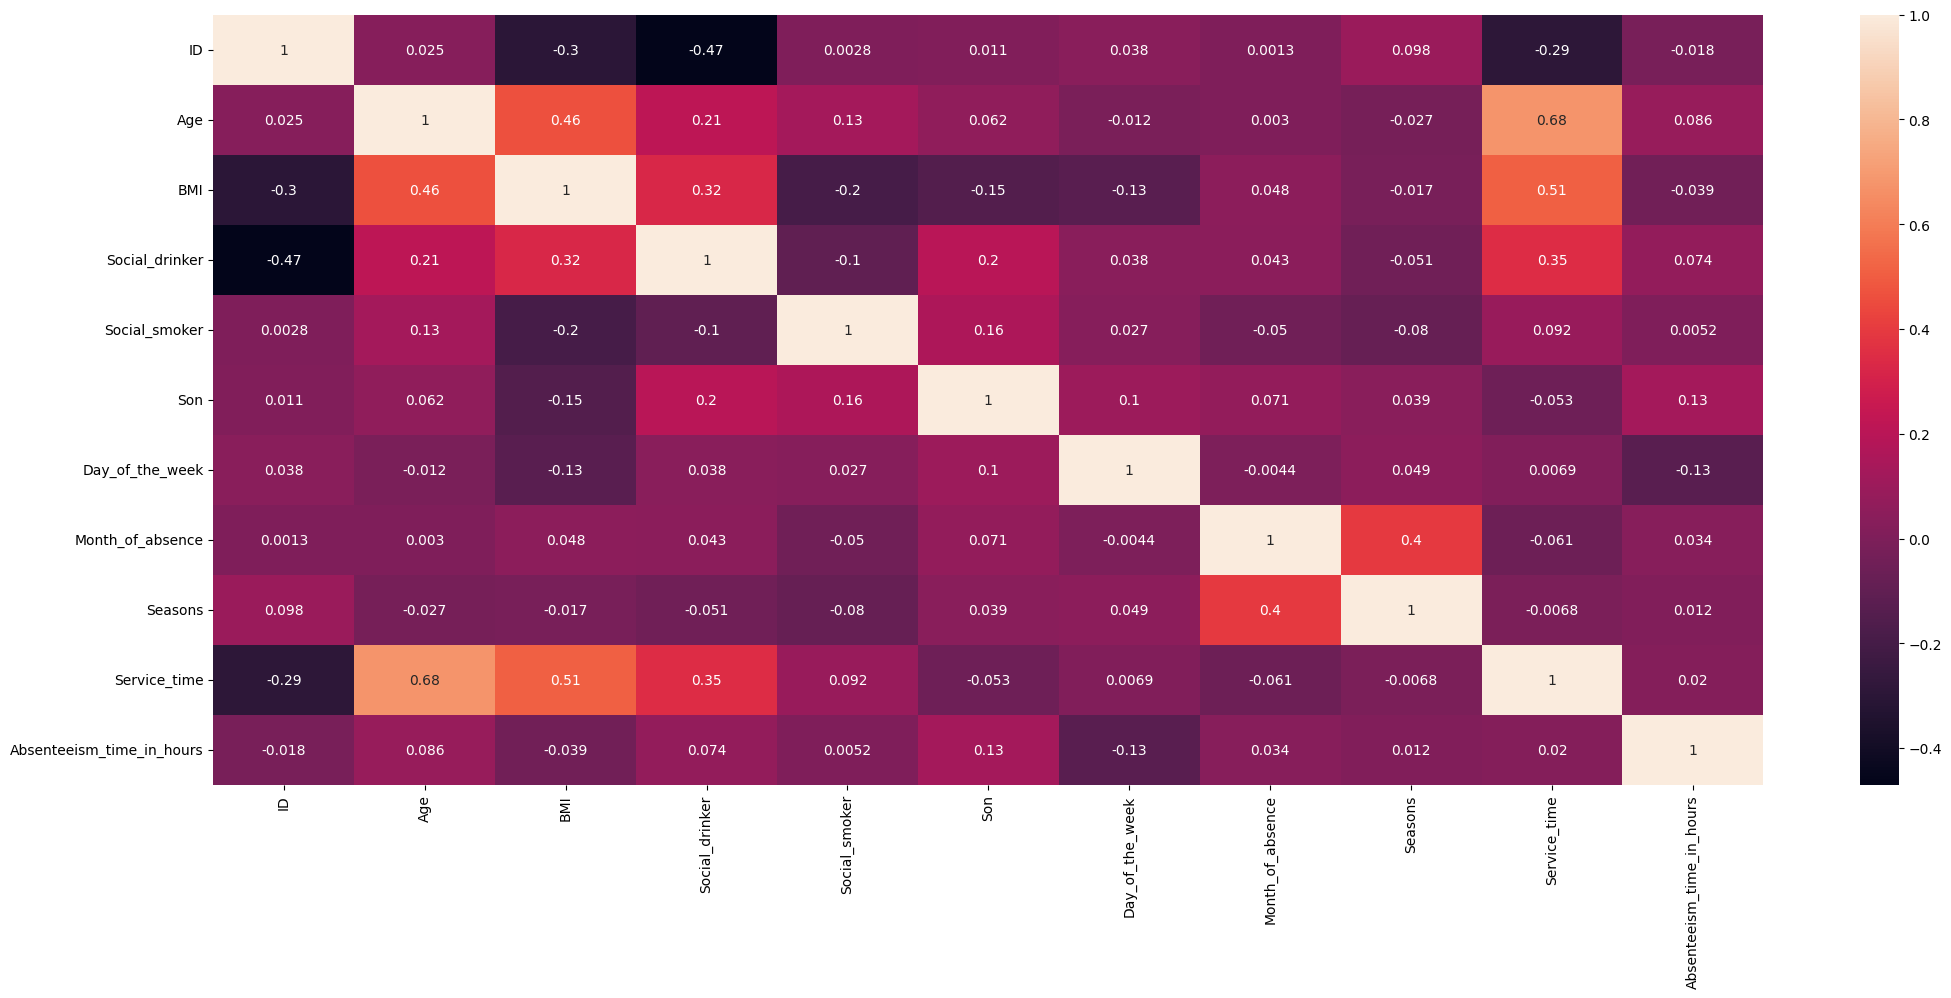

In [ ]:
#Correlation Analysis
correlation_matrix = new_project.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

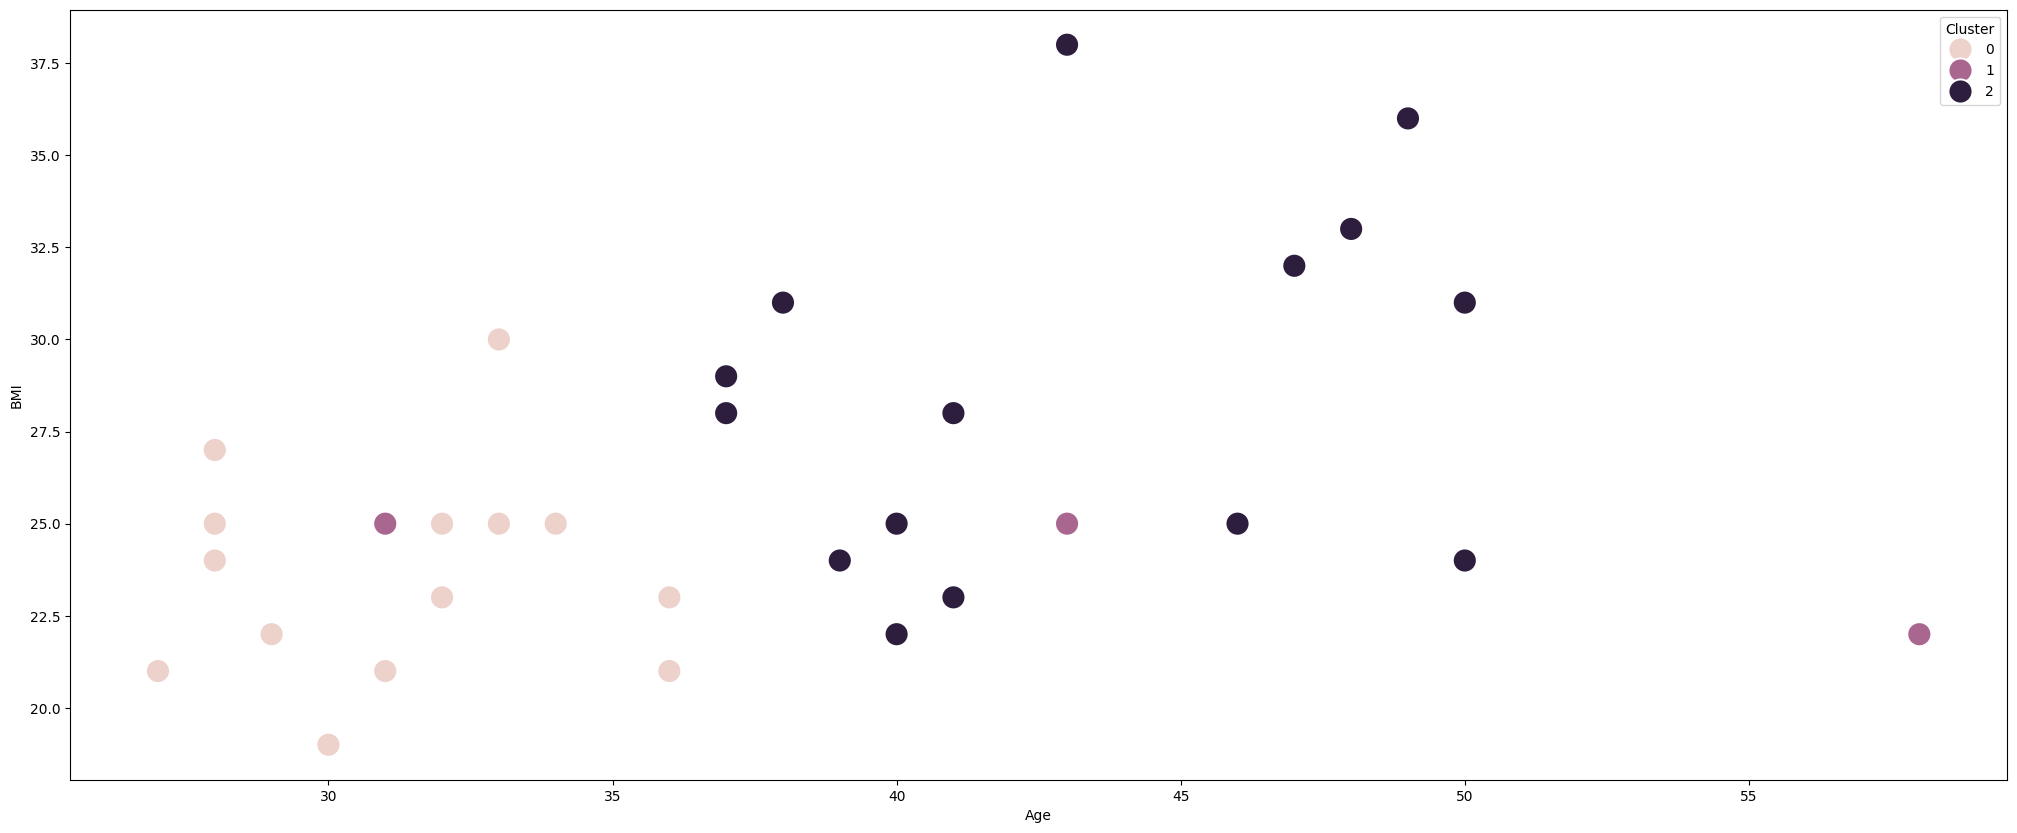

In [ ]:
#Cluster Analysis
kmeans = KMeans(n_clusters=3)
new_project['Cluster'] = kmeans.fit_predict(new_project[['Age', 'BMI', 'Absenteeism_time_in_hours']])
sns.scatterplot(x='Age', y='BMI', hue='Cluster', data=new_project, s=300)
plt.show()

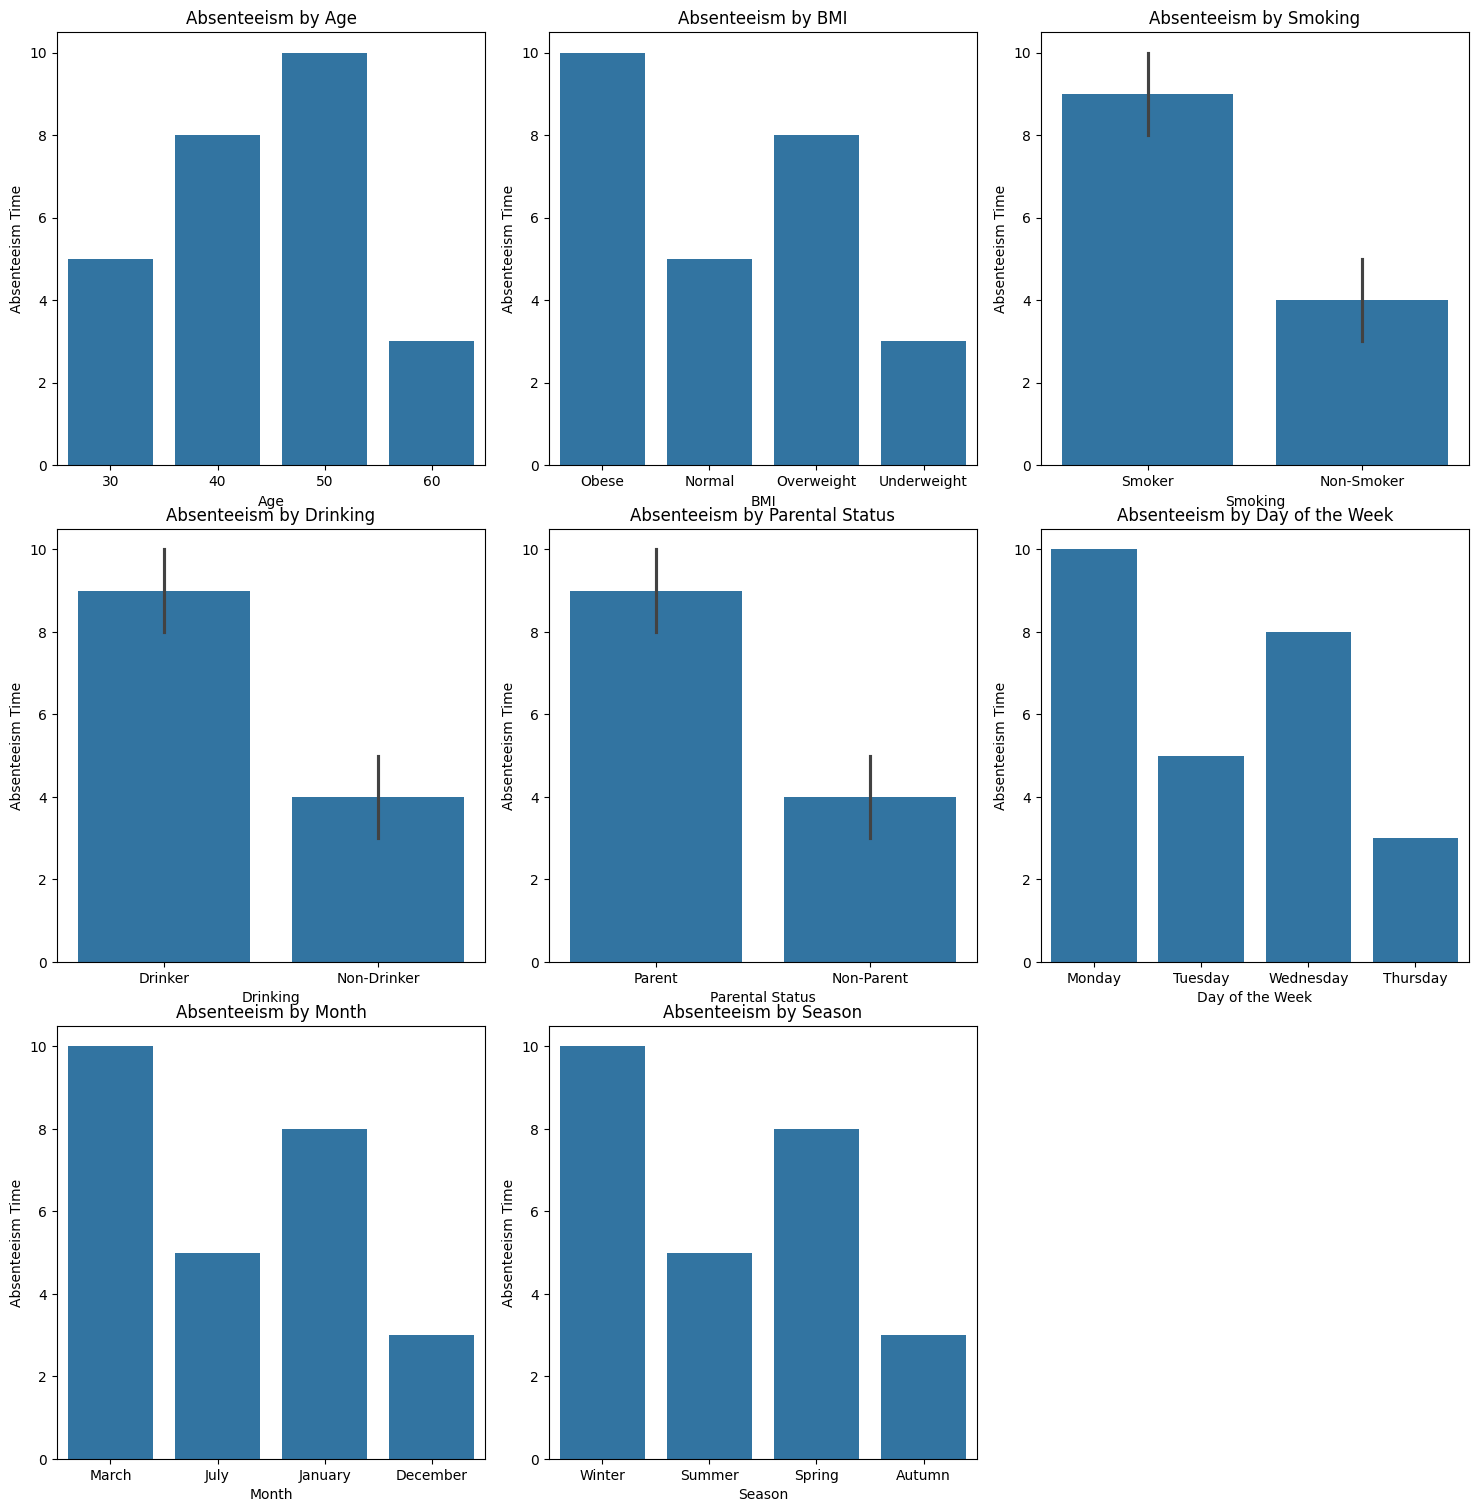

In [ ]:
data = {
    'Age': [50, 30, 40, 60],
    'BMI': ['Obese', 'Normal', 'Overweight', 'Underweight'],
    'Smoking': ['Smoker', 'Non-Smoker', 'Smoker', 'Non-Smoker'],
    'Drinking': ['Drinker', 'Non-Drinker', 'Drinker', 'Non-Drinker'],
    'Parental Status': ['Parent', 'Non-Parent', 'Parent', 'Non-Parent'],
    'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday'],
    'Month': ['March', 'July', 'January', 'December'],
    'Season': ['Winter', 'Summer', 'Spring', 'Autumn'],
    'Absenteeism Time': [10, 5, 8, 3]
}
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.barplot(x='Age', y='Absenteeism Time', data=df, ax=axes[0, 0])
sns.barplot(x='BMI', y='Absenteeism Time', data=df, ax=axes[0, 1])
sns.barplot(x='Smoking', y='Absenteeism Time', data=df, ax=axes[0, 2])
sns.barplot(x='Drinking', y='Absenteeism Time', data=df, ax=axes[1, 0])
sns.barplot(x='Parental Status', y='Absenteeism Time', data=df, ax=axes[1, 1])
sns.barplot(x='Day of the Week', y='Absenteeism Time', data=df, ax=axes[1, 2])
sns.barplot(x='Month', y='Absenteeism Time', data=df, ax=axes[2, 0])
sns.barplot(x='Season', y='Absenteeism Time', data=df, ax=axes[2, 1])

# Adjusting layout and titles
plt.tight_layout()
axes[0, 0].set_title('Absenteeism by Age')
axes[0, 1].set_title('Absenteeism by BMI')
axes[0, 2].set_title('Absenteeism by Smoking')
axes[1, 0].set_title('Absenteeism by Drinking')
axes[1, 1].set_title('Absenteeism by Parental Status')
axes[1, 2].set_title('Absenteeism by Day of the Week')
axes[2, 0].set_title('Absenteeism by Month')
axes[2, 1].set_title('Absenteeism by Season')
axes[2, 2].axis('off')  # Hide the empty subplot

plt.show()

**Complete Result of all the above analysis**


1.  Workers in their 50s had the highest absenteeism.
2.  Obesity led to the highest absenteeism among workers.
3.  Smokers took more leave than non-smokers.
4.  Non-drinkers took more leave than drinkers.
5.  Parents took more leave than non-parents.
6.  Monday was the most common day for workers to start their leave.
7.  March and July were the months with the highest absenteeism.
8.  Winter was the season with the highest absenteeism.



---



---

